In [133]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline,  FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# plotting tools
import matplotlib.pyplot as plt
import pickle

### Two important tools available in Sklearn are Pipeline and FeatureUnion

In [129]:
# Pipeline let you create reusable pipelines for the training and testing phase, avoiding possible errors

#create sample data with different scales
sample_data = np.zeros((1000, 50)) # empty matrix

#10 random columns with integers data and the rest with numbers sampled from a normal distribution
indexes_int = np.random.choice(range(0, 51, 1), 10)

for a in range(0, 50, 1):

    if a in indexes_int:
        sample_data[:,a] = np.random.randint(10, 100, 1000)
    else:
        sample_data[:,a] = np.random.randn(1000)

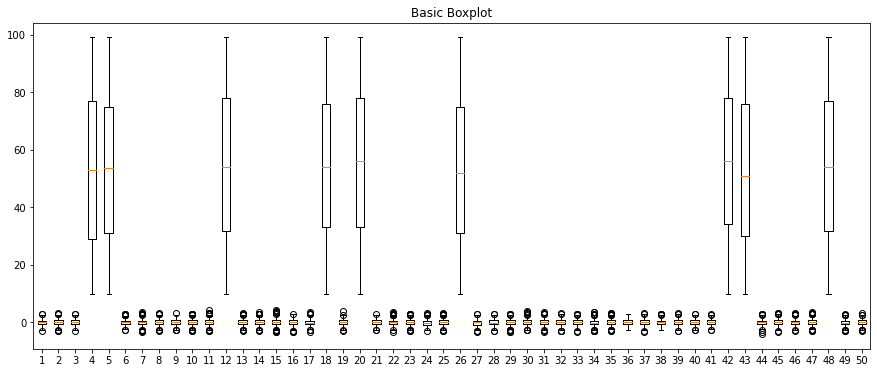

In [130]:
fig1, ax1 = plt.subplots(figsize = (15, 6))
ax1.set_title('Basic Boxplot')
ax1.boxplot(sample_data)
plt.show()

In [131]:
# Data with different scales can make misunderstandings when interpreting the coefficients of a model, so scaling them can be an option to consider

xtrain, xtest, ytrain, ytest = train_test_split(sample_data, target, test_size = 0.3, random_state = 111)

lin_mod = LinearRegression()
lin_mod.fit(xtrain, ytrain)

coeffs = pd.DataFrame(data = {
    'vars' : range(0, 50, 1),
    'coeffs' : lin_mod.coef_
})
coeffs.sort_values('coeffs', ascending = False).head()


,vars,coeffs
12,12,1.465910
20,20,1.086045
16,16,1.084862
23,23,1.055751
36,36,0.990698


In [132]:
xtrain, xtest, ytrain, ytest = train_test_split(sample_data, target, test_size = 0.3, random_state = 111)

# Initialize the Pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('regr', LinearRegression())])
pipe.fit(xtrain, ytrain)
predictions = pipe.predict(xtest)

coeffs = pd.DataFrame(data = {
    'vars' : range(0, 50, 1),
    'coeffs' : pipe['regr'].coef_
})
coeffs.sort_values('coeffs', ascending = False).head()

,vars,coeffs
12,12,1.428749
16,16,1.086940
23,23,1.085712
20,20,1.026623
36,36,0.998283


In [134]:
# Once the pipeline has been trained, can be saved as a pickle object and reused for new data
with open('reg_pipeline.pkl', 'wb') as pl:
    pickle.dump(pipe, pl)